# Fair Division of Indivisible Goods

This is a Jupyter Notebook coming along with the chapter 
* Chapter 12 (Handbook of Computational Social Choice)

This notebook was used as part of the course of :
* The COST Summer School Lecture on Fair Division of Indivisible Items (San Sebastian, July 2016)
* COCOMA: Master ANDROIDE course at Sorbonne Université, 2016-2022

This version: 10-01-2022

## 1. Defining MARA problems

By importing the module `problem`, we can define fair division problems, by specifying a number of agents, a number of resources, and a type of "culture" to draw the preferences from. 

You can either:
* define a **centralized** MARA problem (all the resources are initially held by agent 0, who plays in this case the role of the auctioneer -- and counts as an agent)
* define a **decentralized** MARA problem (resources are initially randomly allocated)

You can also select the method to generate utilities: 
* **uniform**: utilities for each resource is drawn uniformly at random from 1 to 100
* **normalized**: utilities are normalized in [0,1]
* **Borda** utilities (worst resource valued 1, and so on, best one m)
* **empty**: leaves utilites undefined. You can later use p.setUtilities() to set utilities as you wish for a problem p. 

In [1]:
from problem import Problem


In [2]:
p1 = Problem(3,4,'borda',centralized=True)
print(p1)

agent 1{'r0': 3, 'r1': 1, 'r2': 4, 'r3': 2}
agent 2{'r0': 1, 'r1': 4, 'r2': 2, 'r3': 3}



Printing the allocation allows to see which agent holds which resource, and the current utility of each agent. 

In [24]:
print(p1.printAllocation())


auctioneer            ['r0', 'r1', 'r2', 'r3']	
agent  1                                 []	 0
agent  2                                 []	 0



It is also possible to set the allocation by hand, by using the setAllocation method. The allocation is specified as a boolean array. 

In [3]:
p1.setAllocation([[0,0,0,0],[1,1,0,0],[0,0,1,1]])

In [4]:
print(p1.printAllocation())

auctioneer                                  []	
agent  1                       ['r0', 'r1']	 4
agent  2                       ['r2', 'r3']	 5



A problem also handles an (undirected) **visibility graph** among agents. Note that in the centalized case, agent 0 is isolated from the rest (his utility is irrelevant), while all the other agents are by default connected. 

In [5]:
print (p1.visibility_graph)

{0: [], 1: [2], 2: [1]}


In [6]:
p1.setVisibilityGraph({0:[],1:[],2:[]})

No one sees anyone now...

### Example of the course

In [8]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



## 2. Fairness measures

The module `fairness_measures` provides a number of fairness measures for a given allocation: 
* proportionality
* egalitarian social welfare
* various notions of envy

In [9]:
import fairness_measures

In [12]:
p2 = Problem(3,6,'normalized',centralized=False)
print(p2)

agent 0{'r0': 0.084, 'r1': 0.19, 'r2': 0.315, 'r3': 0.059, 'r4': 0.286, 'r5': 0.066}
agent 1{'r0': 0.009, 'r1': 0.003, 'r2': 0.296, 'r3': 0.163, 'r4': 0.239, 'r5': 0.29}
agent 2{'r0': 0.166, 'r1': 0.041, 'r2': 0.094, 'r3': 0.294, 'r4': 0.206, 'r5': 0.2}



In [13]:
print(p2.printAllocation())

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                 ['r0', 'r3', 'r5']	0.20900000000000002
agent  1                             ['r1']	0.003
agent  2                       ['r2', 'r4']	0.3



We can check various fairness properties...

In [14]:
print(fairness_measures.isProportional(p2))

False


In [15]:
print(fairness_measures.egalitarianSW(p2))

0.003


... and build the envy matrix from which several measures can be obtained. 

In [16]:
em2 = fairness_measures.envyMatrix(p2)
print(em2)
print("There are ", fairness_measures.nbEnviousAgents(em2), " envious agents")
print("The maximum envy among two agents is ", fairness_measures.maxEnvy(em2))

[[0.    0.    0.392]
 [0.459 0.    0.532]
 [0.36  0.    0.   ]]
There are  3  envious agents
The maximum envy among two agents is  0.5319999999999999


In [18]:
print(fairness_measures.isEnvyFree(em2))

False


In [19]:
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

True


In [20]:
p1.setVisibilityGraph({0:[],1:[2],2:[1]})
em1 = fairness_measures.envyMatrix(p1)
print(fairness_measures.isEnvyFree(em1))

False


### Question 1

Create an instance involving 3 agents and 4 resources, with the following  utilities for the ressources : 
* agent 0: 6, 6, 1, 7
* agent 1: 1, 3, 9, 7
* agent 2: 8, 0, 4, 8

Find allocations which satisfies : 
* proportionality
* envy-freeness
* maximizes egalitarian social welfare
* maximizes utilitarian social welfare
* maximizes the Nash product

### Question 2

There are a few missing notions though. Code functions which returns:
* whether the allocation is envy-free up to **one** or **any** good
* wether the allocation is proportional up to **one** or **any** good
Test whether you can find a counter-example to the fact that EFX does not imply PROPX. 

Another missing notion is Competitive Equilibrium with equal income. Code functions which: 
* for a problem, given an allocation and a price vector, returns whether this allocation is CEEI
* for a problem, given a price vector, checks whether there exists an allocation in CEEI
* for a a problem, checks whether there exists a pair of price vector and allocation in CEEI

## 3. Solving via MIP

By importing `mipsolving` we get access to functions allowing to optimally solve the problems via MIP formulations (see course). 
The program uses the `Pulp` libray for linear programming. 

In [22]:
import mipsolving

In [23]:
e3 = mipsolving.envyminimizingLP(p3,verbose=True)
print("the final max envy is ",e3)

Status: Optimal
envy_bound
0.0
agent  1  gets resource r4
agent  1  gets resource r5
agent  2  gets resource r1
agent  2  gets resource r2
agent  3  gets resource r0
agent  3  gets resource r3
the final max envy is  0.0


(Note that this has not modified the initial problem)

In [25]:
print(mipsolving.assignmentLP(p2,verbose=True))

agent  1  gets resource r1
agent  1  gets resource r2
agent  1  gets resource r5
agent  2  gets resource r0
agent  2  gets resource r3
agent  2  gets resource r4
0.589


## 4. How likely is it to get an envy-free allocation? 

For facilitating the run of several problems with varying or similar parameters, the module simulations provides a few functions. 

In [26]:
import simulations


Let us illustrate this on a specific question, adressed by Dickerson et al. in their paper: 
* The computational Rise and Fall of Fairness, AAAI-2014

In [27]:
tested_resources = list(range(5,10)) # from 5 to 10 resources
tested_agents = [5] # only 5 agents
max_envy,ratio_ef = simulations.simulationOpt(50,tested_agents,tested_resources,'normalized')
#print (max_envy,ratio_ef)
print("Experiments completed!")

Experiments completed!


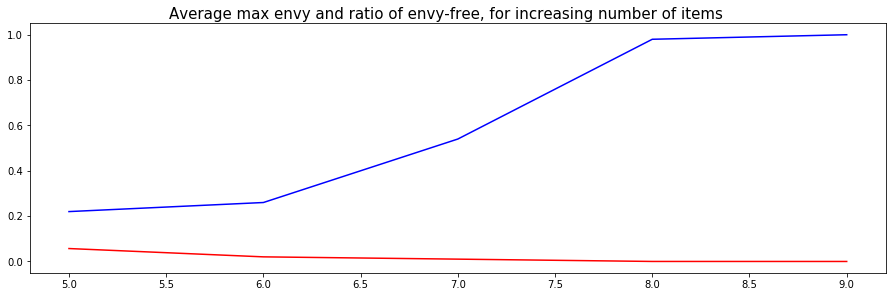

In [28]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import networkx as nx
import pylab
figsize(12.5, 4)
p = np.linspace(tested_resources[0], tested_resources[0]+len(tested_resources)-1,len(tested_resources))
#print(p)
plt.plot(p, max_envy[0], color='red')
plt.plot(p, ratio_ef[0], color = 'blue')
legende = "Average max envy and ratio of envy-free, for increasing number of items"
plt.suptitle(legende, y=1.02, fontsize=15)
plt.tight_layout()

### Question 3
Play a little bit with these simulations and try to determine:
* for 2 agents, how the max envy evolves, from which number of items
you can be reasonably sure to get an envy-free allocation
* same question for 5 agents

## 5. Envy-Freeness on Graph

Agents can only envy their neighbours in the visibility (Idea: you can't envy someone you don't see). 

Augment the code of mipsolving so as to account for graph envy-freeness, ie. an envy is only considered among agents which are neighbours in the graph. Then, test how likely it is to get a graph-envy free allocation:
* on a line of 10 agents, with Borda utilities,
* on a star of 10 agents, with Borda utilities.